In [1]:
from aiida import load_profile
from aiida.orm import load_node, load_group
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
load_profile('lauerm-prod')

Profile<uuid='3199e329b1c748319390ff8be24b9c6c' name='lauerm-prod'>

In [80]:
def plot_k_convergence(node, ax, verbosity = 0, title=None):

    data = node.outputs.converge.data.get_dict()

    k = []
    energies = []
    ticks = []
    for pt in data['kpoints_regular']:
        kx = pt[0]
        kz = pt[2]
        k.append(np.sqrt(4 * kx **2 + kz ** 2))

        energies.append(pt[4])

        if len(energies) > 1 and verbosity > 0:
            print(f"{energies[-1] - energies[-2]:.3e}")

    ax.set_xticks(k)
    ax.set_xticklabels([f"{dat[:3]}" for dat in data['kpoints_regular']], rotation=90)
    ax.set_yticks([])

    ax.plot(k, energies, marker='o', linestyle='-')

    if title:
        ax.title(title)

    differences = [energies[idx] - energies[-1] for idx in range(len(energies))]
    differences_2 = [energies[idx] - energies[idx-1] for idx in range(1,len(energies))]

    ax2 = ax.twinx()
    ax2.plot(k, differences, marker='x', linestyle='-', color='orange')

    ax2.axhline(1e-3, color='grey', linestyle='--')
    ax2.axhline(-1e-3, color='grey', linestyle='--')

    ax3 = ax2.twinx()
    ax3.plot(k[:-1], differences_2, marker='x', linestyle='-', color='green')

    ax3.axhline(1e-3, color='grey', linestyle='--')
    ax3.axhline(-1e-3, color='grey', linestyle='--')


    

525.0
475.0
550.0
450.0


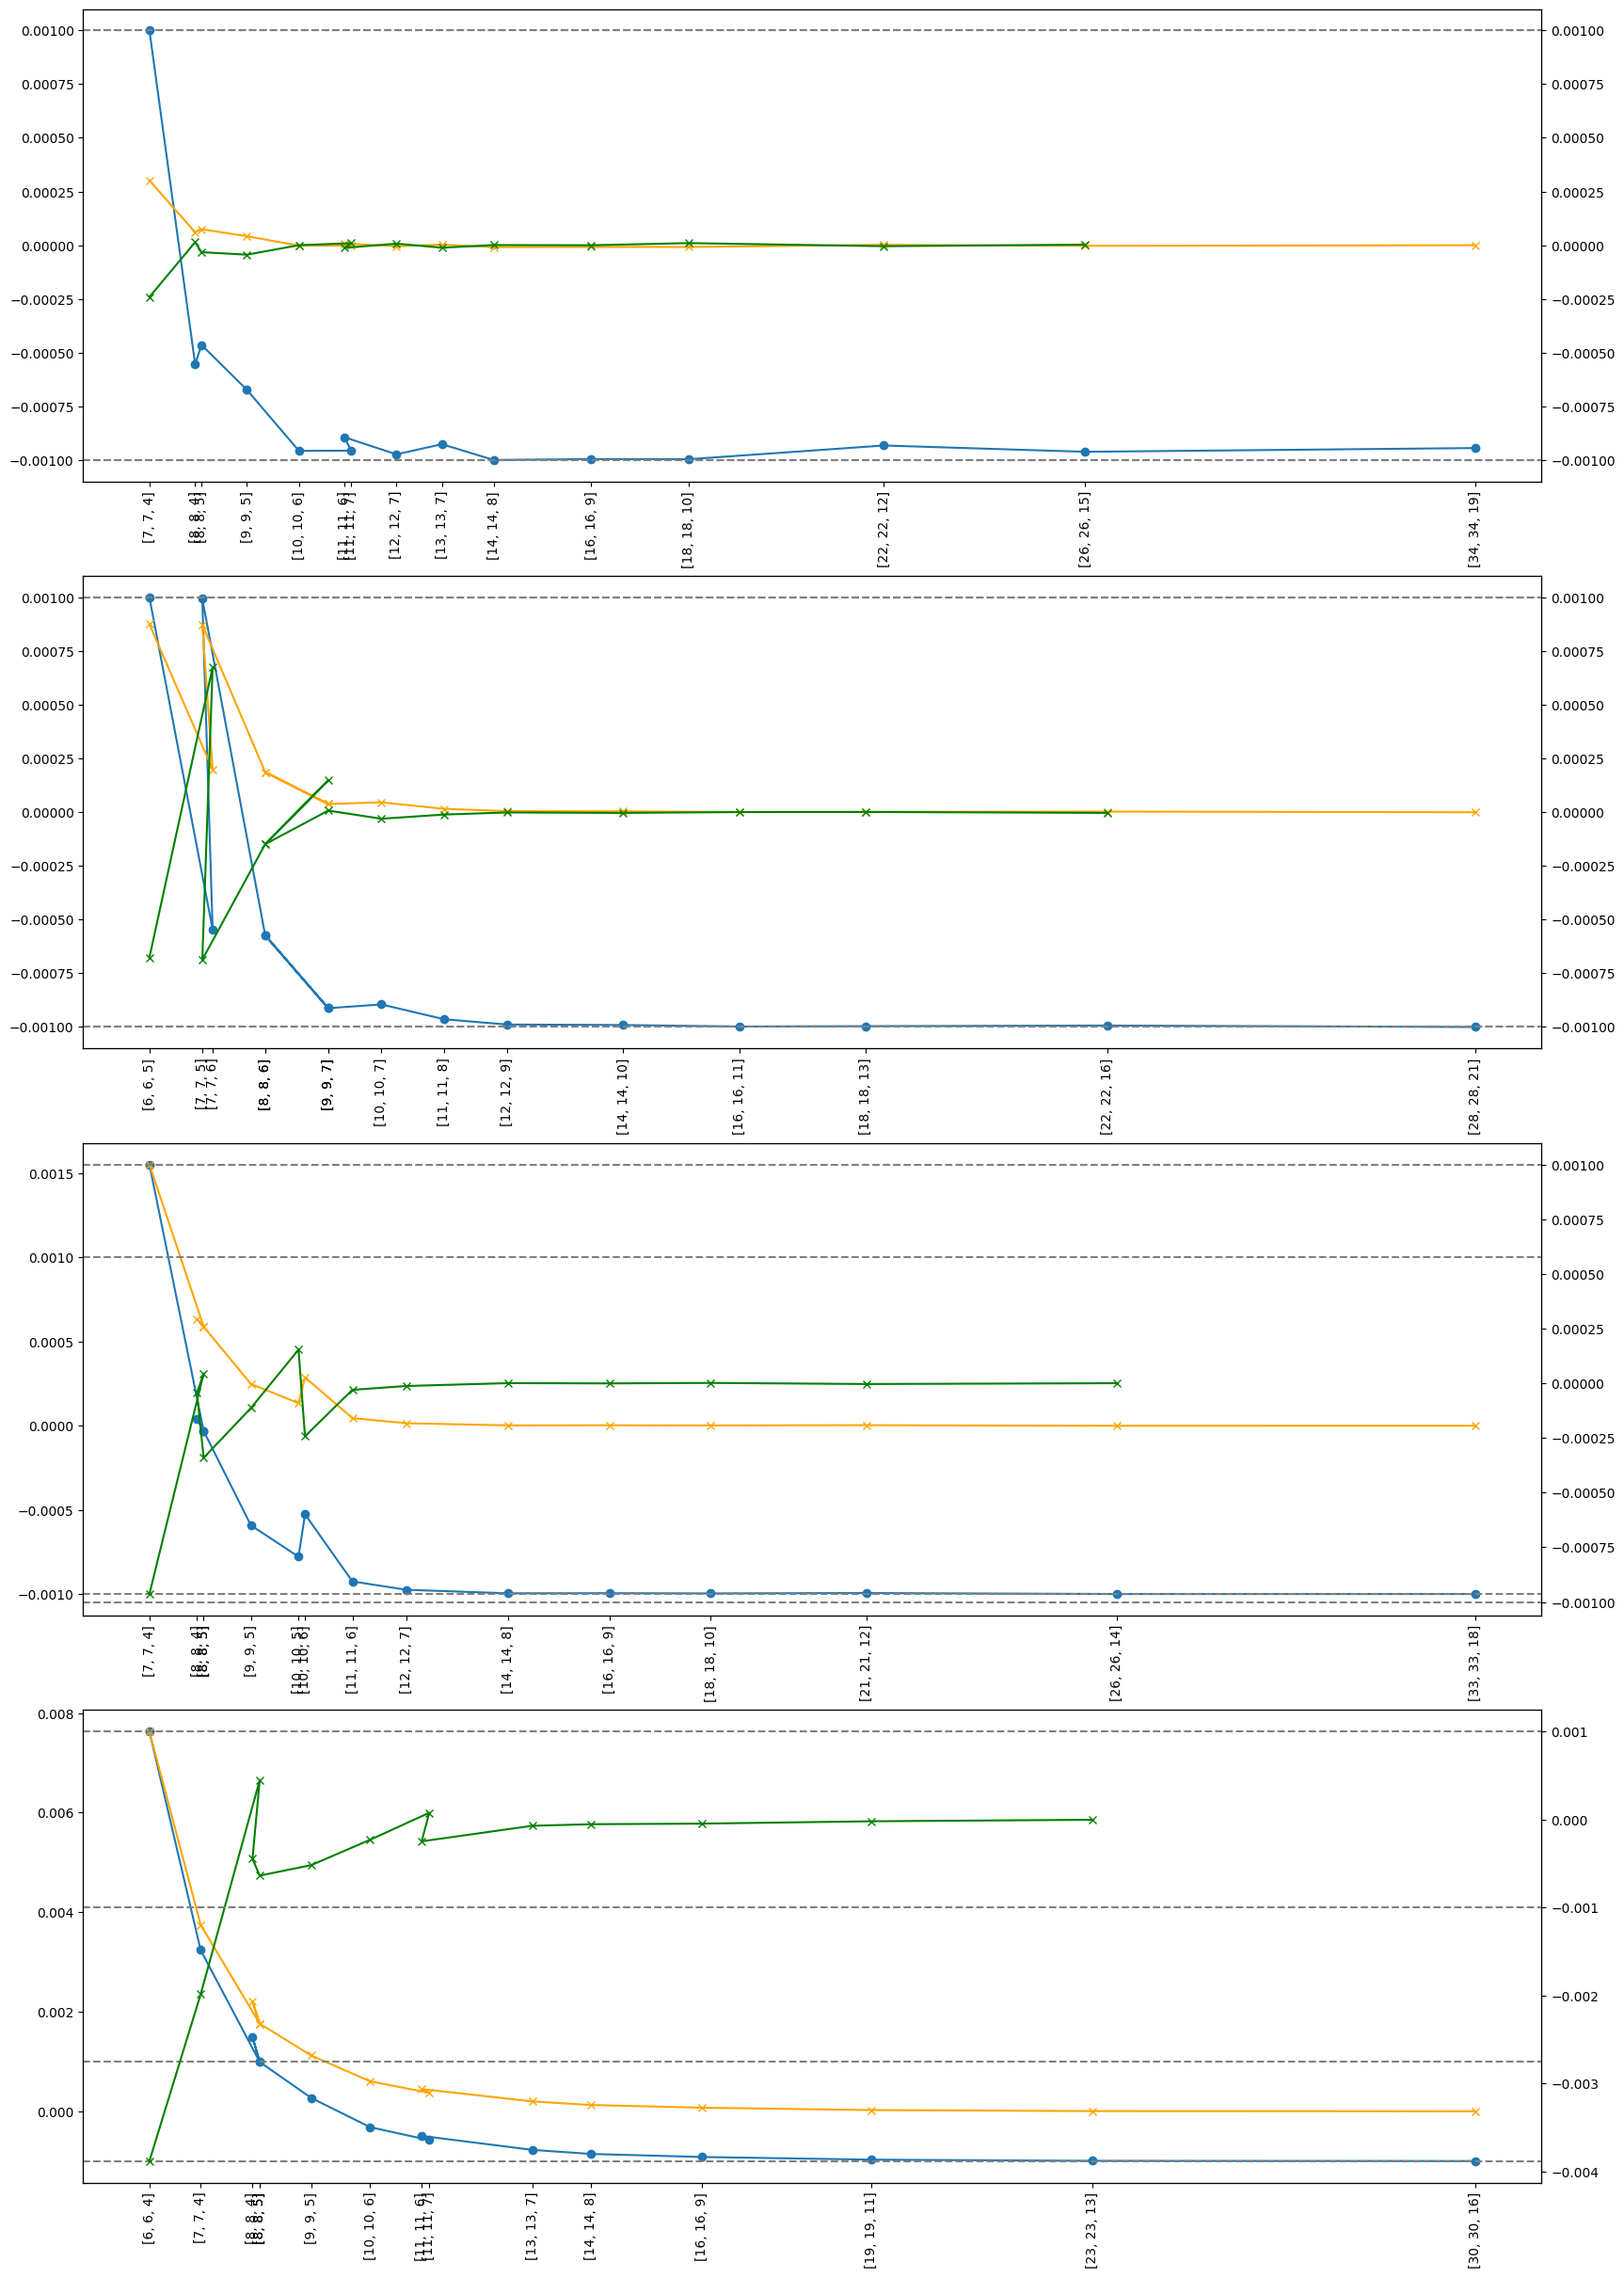

In [81]:

fig, ax = plt.subplots(4, 1, figsize=(20,30))

for idx, n in enumerate(load_group(5).nodes):
    k_rec = n.outputs.converge.kpoints_recommended.get_kpoints_mesh()
    pw_rec = n.outputs.converge.pwcutoff_recommended.value
    # print(k_rec, pw_rec) Wrong Parameters used, so don't use
    print(pw_rec)
    plot_k_convergence(n, ax[idx])

### Out - Convergence Parameter for VolOptWorkChain 
converged to 1e-3 eV
* AlN - 525 eV - [7 x 7 x 4]
* AlN - 475 eV - [7 x 7 x 4]
* AlN - 550 eV - [7 x 7 x 4]
* AlN - 450 eV - [10 x 10 x 6]

Choose highest values - 550 eV and [10 x 10 x 6] for all 4 structures - cause - why not?